# Feature Selection

## Dropping education_num column

In [1]:
import pandas as pd

df_train = pd.read_csv("adult_combined_train_80_imputed.csv")
df_test = pd.read_csv("adult_combined_test_20_imputed.csv")

# Drop the 'education' column
df_train = df_train.drop(columns=["education_num"])
df_test = df_test.drop(columns=["education_num"])

# Save the dataset
df_train.to_csv("adult_combined_train_80_imputed_2.csv", index=False)
df_test.to_csv("adult_combined_test_20_imputed_2.csv", index=False)

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("adult_combined_train_80_imputed_2.csv")

# Columns to analyze
columns = ['workclass', 'education', 'occupation', 'native_country']

# Display unique values and their counts for each column
for col in columns:
    print(f"--- Unique values in '{col}' ---")
    print(df[col].value_counts())
    print("\n")

--- Unique values in 'workclass' ---
workclass
Private             28159
Self-emp-not-inc     3047
Local-gov            2537
Self-emp-inc         1722
State-gov            1543
Federal-gov          1133
Never-worked          221
Without-pay            17
Name: count, dtype: int64


--- Unique values in 'education' ---
education
HS-grad         12449
Some-college     8603
Bachelors        6209
Masters          2073
Assoc-voc        1632
11th             1441
Assoc-acdm       1272
10th             1100
7th-8th           751
Prof-school       636
9th               593
12th              519
Doctorate         437
5th-6th           404
1st-4th           197
Preschool          63
Name: count, dtype: int64


--- Unique values in 'occupation' ---
occupation
Prof-specialty       4960
Exec-managerial      4951
Craft-repair         4877
Adm-clerical         4431
Sales                4375
Other-service        4168
Machine-op-inspct    2793
Handlers-cleaners    1994
Transport-moving     1882
Farming

In [3]:
import pandas as pd

# Load the CSV files
train_df = pd.read_csv("adult_combined_train_80_imputed_2.csv")
test_df = pd.read_csv("adult_combined_test_20_imputed_2.csv")

# Function to group workclass
def group_workclass(df):
    return df['workclass'].replace({
        'Private': 'Private',
        'Self-emp-not-inc': 'Self-Employed',
        'Self-emp-inc': 'Self-Employed',
        'Federal-gov': 'Government',
        'State-gov': 'Government',
        'Local-gov': 'Government',
        'Without-pay': 'Unemployed',
        'Never-worked': 'Unemployed'
    })

# Function to group education
def group_education(df):
    return df['education'].replace({
        'Preschool': 'Dropout', '1st-4th': 'Dropout', '5th-6th': 'Dropout',
        '7th-8th': 'Dropout', '9th': 'Dropout', '10th': 'Dropout',
        '11th': 'Dropout', '12th': 'Dropout',
        'HS-grad': 'High School',
        'Some-college': 'Some College', 'Assoc-acdm': 'Some College', 'Assoc-voc': 'Some College',
        'Bachelors': 'Bachelors',
        'Masters': 'Advanced', 'Doctorate': 'Advanced', 'Prof-school': 'Advanced'
    })

# Function to group occupation
def group_occupation(df):
    return df['occupation'].replace({
        'Tech-support': 'Support',
        'Craft-repair': 'Blue-Collar',
        'Other-service': 'Service',
        'Sales': 'Sales',
        'Exec-managerial': 'White-Collar',
        'Prof-specialty': 'White-Collar',
        'Handlers-cleaners': 'Blue-Collar',
        'Machine-op-inspct': 'Blue-Collar',
        'Adm-clerical': 'White-Collar',
        'Farming-fishing': 'Blue-Collar',
        'Transport-moving': 'Blue-Collar',
        'Priv-house-serv': 'Service',
        'Protective-serv': 'Service',
        'Armed-Forces': 'Military'
    })

# Function to group native_country
def group_country(country):
    if country == 'United-States':
        return 'USA'
    elif country in ['Canada', 'Mexico']:
        return 'North America'
    elif country in ['El-Salvador', 'Puerto-Rico', 'Cuba', 'Jamaica', 'Dominican-Republic', 'Guatemala', 'Honduras', 'Nicaragua', 'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)']:
        return 'Central America'
    elif country in ['Columbia', 'Ecuador', 'Peru']:
        return 'South America'
    elif country in ['Germany', 'England', 'Italy', 'Poland', 'Portugal', 'France', 'Ireland', 'Scotland', 'Yugoslavia', 'Hungary', 'Holand-Netherlands', 'Greece']:
        return 'Europe'
    elif country in ['India', 'Philippines', 'Vietnam', 'China', 'Japan', 'Iran', 'Cambodia', 'Thailand', 'Laos', 'Hong', 'Taiwan']:
        return 'Asia'
    elif country == 'South':
        return 'Other Asia'
    else:
        return 'Other'

# Apply the transformations to both datasets
for df in [train_df, test_df]:
    df['workclass_grouped'] = group_workclass(df)
    df['education_grouped'] = group_education(df)
    df['occupation_grouped'] = group_occupation(df)
    df['native_country_grouped'] = df['native_country'].apply(group_country)

    # Drop original columns
    df.drop(columns=['workclass', 'education', 'occupation', 'native_country'], inplace=True)

# Optional: Save the new files
train_df.to_csv("adult_combined_train_80_imputed_2_grouped.csv", index=False)
test_df.to_csv("adult_combined_test_20_imputed_2_grouped.csv", index=False)


In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv("adult_combined_train_80_imputed_2_grouped.csv")

# Columns to analyze
columns = ['workclass_grouped', 'education_grouped', 'occupation_grouped', 'native_country_grouped']

# Display unique values and their counts for each column
for col in columns:
    print(f"--- Unique values in '{col}' ---")
    print(df[col].value_counts())
    print("\n")

--- Unique values in 'workclass_grouped' ---
workclass_grouped
Private          28159
Government        5213
Self-Employed     4769
Unemployed         238
Name: count, dtype: int64


--- Unique values in 'education_grouped' ---
education_grouped
High School     12449
Some College    11507
Bachelors        6209
Dropout          5068
Advanced         3146
Name: count, dtype: int64


--- Unique values in 'occupation_grouped' ---
occupation_grouped
White-Collar    14342
Blue-Collar     13000
Service          5497
Sales            4375
Support          1120
Military           45
Name: count, dtype: int64


--- Unique values in 'native_country_grouped' ---
native_country_grouped
USA                35085
North America        928
Asia                 766
Central America      690
Europe               611
South America        140
Other Asia            96
Other                 63
Name: count, dtype: int64




## Checking the Correlationship between Numerical Features and Target Column with Kruskal-Wallis H Test

In [5]:
import pandas as pd
from scipy.stats import kruskal

# Load cleaned data
df = pd.read_csv('adult_combined_train_80_imputed_2_grouped.csv')

# Encode the binary income column
df['income'] = df['income'].apply(lambda x: 1 if '>50K' in x else 0)

# Select numeric features (excluding income)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols.remove('income')

print("🔍 Kruskal-Wallis H Test Results:\n")

# Apply Kruskal-Wallis test for each numeric feature
for col in numeric_cols:
    group1 = df[df['income'] == 0][col]
    group2 = df[df['income'] == 1][col]
    
    stat, p = kruskal(group1, group2)
    print(f"{col}: H-statistic = {stat:.4f}, p-value = {p:.4f}")

🔍 Kruskal-Wallis H Test Results:

age: H-statistic = 2752.7824, p-value = 0.0000
fnlwgt: H-statistic = 1.3173, p-value = 0.2511
capital_gain: H-statistic = 2919.4135, p-value = 0.0000
capital_loss: H-statistic = 724.5646, p-value = 0.0000
hours_per_week: H-statistic = 2831.7150, p-value = 0.0000


## Checking the Correlationship between Categorical Features and Target Column with Chi-Squared Test

In [6]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load your dataset
df = pd.read_csv("adult_combined_train_80_imputed_2_grouped.csv")

# Define the categorical columns and target
categorical_columns = [ 
    "workclass_grouped", "education_grouped", "occupation_grouped", "native_country_grouped",
    "marital_status", "relationship", "race", "sex"
]
target = "income"

# Run Chi-Square test
chi2_results = []

for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df[target])
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    chi2_results.append({
        'Feature': col,
        'Chi2 Statistic': chi2_stat,
        'Degrees of Freedom': dof,
        'p-value': p_val
    })

# Convert to DataFrame for display
chi2_df = pd.DataFrame(chi2_results)
chi2_df.sort_values(by='Chi2 Statistic', ascending=False, inplace=True)

print("🔍 Chi-Square Test Results:\n")

# Show results
print(chi2_df)

🔍 Chi-Square Test Results:

                  Feature  Chi2 Statistic  Degrees of Freedom        p-value
5            relationship     7883.639398                   5   0.000000e+00
4          marital_status     7652.648366                   6   0.000000e+00
1       education_grouped     5047.792636                   4   0.000000e+00
2      occupation_grouped     2237.854846                   5   0.000000e+00
7                     sex     1778.554180                   1   0.000000e+00
0       workclass_grouped      559.818605                   3  5.172161e-121
6                    race      395.351340                   4   2.809907e-84
3  native_country_grouped      231.383182                   7   2.522685e-46


## Apply PCA

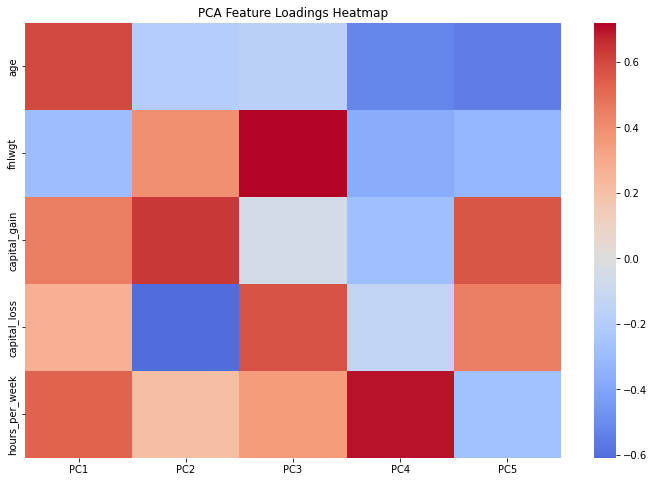


Explained Variance Ratio:
PC1    0.236261
PC2    0.207221
PC3    0.202200
PC4    0.182006
PC5    0.172312
dtype: float64

Top 3 Contributing Features per PC:
              PC1           PC2             PC3             PC4           PC5
0             age  capital_gain          fnlwgt  hours_per_week  capital_gain
1  hours_per_week  capital_loss    capital_loss             age           age
2    capital_gain        fnlwgt  hours_per_week          fnlwgt  capital_loss

Least Contributing Features Overall (sum of absolute loadings):
capital_gain      1.981602
age               2.032131
capital_loss      2.044675
hours_per_week    2.045623
fnlwgt            2.101087
dtype: float64

 Contributions of Features per PC:
                     PC1       PC2       PC3       PC4       PC5
fnlwgt         -0.294411  0.392629  0.718300 -0.372143 -0.323605
hours_per_week  0.529546  0.205604  0.345366  0.697396 -0.267711
capital_loss    0.269171 -0.608652  0.576750 -0.136403  0.453700
age             0.

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("adult_combined_train_80_imputed_2_grouped.csv")

# Drop non-numeric columns (e.g., target variable or categorical columns if not encoded)
numerical_df = df.select_dtypes(include=[np.number])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numerical_df)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Get loadings (contributions of original features to PCs)
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                        index=numerical_df.columns)

# Get explained variance ratio (optional)
explained_var = pd.Series(pca.explained_variance_ratio_, index=[f'PC{i+1}' for i in range(pca.n_components_)])

# Top contributing features to each component
top_features_per_pc = loadings.abs().apply(lambda x: x.nlargest(3).index.tolist())

# Least contributing features overall (sum of absolute loadings across PCs)
least_contributors = loadings.abs().sum(axis=1).nsmallest(5)

# Visualize heatmap of loadings
plt.figure(figsize=(12, 8))
sns.heatmap(loadings, cmap='coolwarm', center=0)
plt.title("PCA Feature Loadings Heatmap")
plt.show()

# Print outputs
print("\nExplained Variance Ratio:")
print(explained_var)

print("\nTop 3 Contributing Features per PC:")
print(top_features_per_pc)

print("\nLeast Contributing Features Overall (sum of absolute loadings):")
print(least_contributors)

# Create a wide-format loadings matrix
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=numerical_df.columns
)

# Sort features by total absolute contribution across all PCs (descending)
sorted_loadings = loadings.reindex(
    loadings.abs().sum(axis=1).sort_values(ascending=False).index
)

# Display the sorted loadings table
print("\n Contributions of Features per PC:")
print(sorted_loadings)

## Apply FAMD

In [21]:
# pip install prince

In [22]:
import pandas as pd
import prince 

# Load dataset
df = pd.read_csv("adult_combined_train_80_imputed_2_grouped.csv")

# Drop the target column
df_features = df.drop(columns=["income"])

# Convert all integer columns to float
for col in df_features.select_dtypes(include='int64').columns:
    df_features[col] = df_features[col].astype(float)

# Fit FAMD
famd = prince.FAMD(n_components=len(df_features.columns), random_state=42)
famd = famd.fit(df_features)

# Get feature-PC coordinates (loadings)
loadings = famd.column_coordinates_

# Sort features by contribution to PC1
sorted_by_pc1 = loadings.abs().sort_values(by=0, ascending=False)

# Display results
print("🔍 Feature contributions to the first principal component (excluding target 'income'):")
print(sorted_by_pc1)

# ✅ Get explained variance (inertia) for each principal component
famd.eigenvalues_summary

🔍 Feature contributions to the first principal component (excluding target 'income'):
component                     0         1         2         3         4   \
variable                                                                   
relationship            0.873735  0.200327  0.174055  0.450168  0.526441   
marital_status          0.800454  0.097616  0.165822  0.448874  0.242429   
sex                     0.504284  0.078604  0.019114  0.007790  0.057134   
occupation_grouped      0.126587  0.439142  0.062617  0.126357  0.106671   
hours_per_week          0.099277  0.011576  0.012207  0.001319  0.023763   
age                     0.097055  0.069348  0.069898  0.141763  0.010865   
workclass_grouped       0.087311  0.136373  0.048180  0.006051  0.039257   
race                    0.070626  0.228789  0.610214  0.098889  0.086448   
education_grouped       0.048288  0.399134  0.042230  0.221242  0.090079   
capital_gain            0.011566  0.011675  0.001627  0.000696  0.000081   
na

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,10.294,7.10%,7.10%
1,7.527,5.19%,12.29%
2,7.047,4.86%,17.15%
3,6.218,4.29%,21.44%
4,5.217,3.60%,25.04%
5,4.982,3.44%,28.47%
6,4.770,3.29%,31.76%
7,4.499,3.10%,34.86%
8,4.312,2.97%,37.84%


## Saving FAMD Transformed Data

In [26]:
import pandas as pd
import prince

# Load training dataset
df_train = pd.read_csv("adult_combined_train_80_imputed_2_grouped.csv")
df_income_train = df["income"]

# Convert all integer columns to float
for col in df_train.select_dtypes(include='int64').columns:
    df_train[col] = df_train[col].astype(float)

# Transform training features
df_famd_train = famd.transform(df_train)
df_famd_train.columns = [f'PC{i+1}' for i in range(df_famd_train.shape[1])]

# Attach income column back
df_famd_train["income"] = df_income_train

# Save to CSV
df_famd_train.to_csv("famd_transformed_train.csv", index=False)

# --- Now apply to test dataset ---

# Load test dataset
df_test = pd.read_csv("adult_combined_test_20_imputed_2_grouped.csv")
df_income_test = df_test["income"]

# Convert all integer columns to float
for col in df_test.select_dtypes(include='int64').columns:
    df_test[col] = df_test[col].astype(float)

# Transform test features using the same FAMD model
df_famd_test = famd.transform(df_test)
df_famd_test.columns = [f'PC{i+1}' for i in range(df_famd_test.shape[1])]

# Attach income column back
df_famd_test["income"] = df_income_test

# Save to CSV
df_famd_test.to_csv("famd_transformed_test.csv", index=False)

## Visualizing FAMD with PC1 and PC2

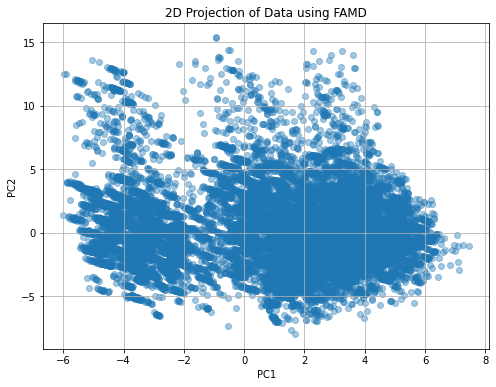

In [27]:
df_famd = famd.transform(df_features)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df_famd[0], df_famd[1], alpha=0.4)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D Projection of Data using FAMD")
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'FAMD Projection Colored by Income')

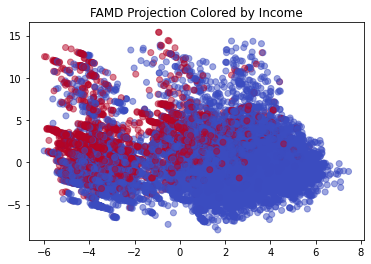

In [28]:
plt.scatter(df_famd[0], df_famd[1], c=(df["income"] == ">50K").astype(int), cmap="coolwarm", alpha=0.5)
plt.title("FAMD Projection Colored by Income")


## K-Means Clustering + Optimal K Selection on FAMD

### Find the best k value with Elbow method

/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


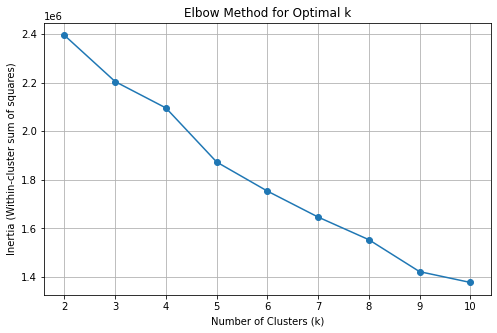

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_famd)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


### Find the best k values with Silhouette Score method

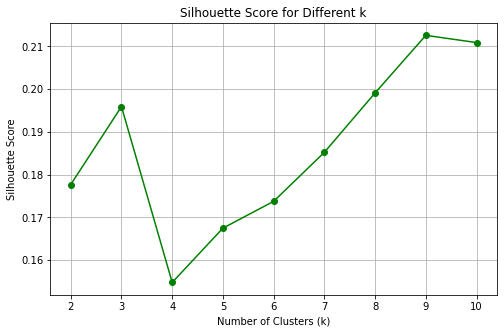

In [30]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(df_famd)
    score = silhouette_score(df_famd, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')
plt.grid(True)
plt.show()


### K-mean clustering with best k (k = 9, based on Silhouette Score)

Text(0.5, 1.0, 'FAMD + KMeans Clustering')

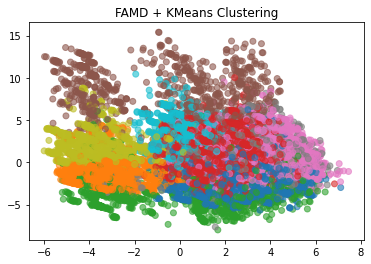

In [31]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=9, random_state=42)
labels = kmeans.fit_predict(df_famd)

# Visualize clusters
plt.scatter(df_famd[0], df_famd[1], c=labels, cmap='tab10', alpha=0.6)
plt.title("FAMD + KMeans Clustering")

In [32]:
df_clustered = df.copy()
df_clustered["cluster"] = labels

In [33]:
# Assuming df_clustered has the cluster labels
numeric_summary = df_clustered.groupby("cluster").mean(numeric_only=True)
print("🔢 Numeric Summary per Cluster:")
print(numeric_summary)


🔢 Numeric Summary per Cluster:
               age         fnlwgt  capital_gain  capital_loss  hours_per_week
cluster                                                                      
0        24.269446  192599.809916    160.822355     39.347582       32.652418
1        43.406845  183497.522158    752.693271     86.209281       43.582715
2        34.821253  241520.950860    352.533170     52.976044       39.216216
3        36.424444  189921.950422    751.416003     71.162882       41.329568
4        38.469807  174057.903382   1739.807971    105.502415       40.461353
5        39.168177  193487.088117    370.917170     50.915660       39.658610
6        56.564048  177067.383581    554.986553     85.643312       33.387827
7        44.559355  186229.890990   3092.635975    170.964814       45.451332
8        40.139196  182980.171229   1528.718695    114.733838       37.255679


In [34]:
categorical_cols = [
    "sex", "marital_status", "relationship",
    "education_grouped", "workclass_grouped",
    "occupation_grouped", "race", "native_country_grouped",
    "income"
]

for col in categorical_cols:
    print(f"\n🔠 Categorical Distribution of '{col}' by Cluster:")
    print(df_clustered.groupby("cluster")[col].value_counts(normalize=True).unstack().round(2))



🔠 Categorical Distribution of 'sex' by Cluster:
sex      Female  Male
cluster              
0          0.44  0.56
1          0.00  1.00
2          0.27  0.73
3          0.46  0.54
4          0.31  0.69
5          0.72  0.28
6          0.75  0.25
7           NaN  1.00
8          0.99  0.01

🔠 Categorical Distribution of 'marital_status' by Cluster:
marital_status  Divorced  Married-AF-spouse  Married-civ-spouse  \
cluster                                                           
0                   0.02                NaN                0.01   
1                   0.00                NaN                1.00   
2                   0.07                NaN                0.40   
3                   0.36                NaN                0.01   
4                   0.06                NaN                0.54   
5                   0.48                NaN                 NaN   
6                   0.03                NaN                0.06   
7                   0.00                NaN   

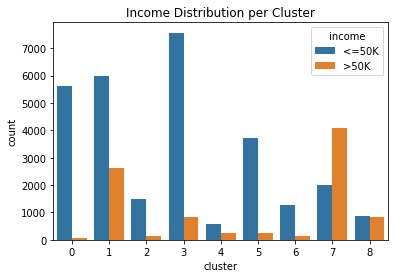

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_clustered, x="cluster", hue="income")
plt.title("Income Distribution per Cluster")
plt.show()


## 🔍 Cluster Analysis from FAMD + KMeans (k=9)

This report analyzes each cluster using consistent demographic and categorical attributes:  
**Average Age, Relationship, Marital Status, Education, Occupation, Race, and Income**

---

### 🟦 Cluster 0: Young Dependents / Students

- **Average Age**: 24  
- **Relationship**: 93% Own-child  
- **Marital Status**: 96% Never-married  
- **Education**: 43% Some College, 27% High School, 20% Dropout  
- **Occupation**: 30% Blue-Collar, 29% Service, 25% White-Collar  
- **Race**: 85% White, 12% Black  
- **Income**: 99% ≤50K

---

### 🟦 Cluster 1: Married Blue-Collar Men

- **Average Age**: 43  
- **Relationship**: 99% Husband  
- **Marital Status**: 100% Married-civ-spouse  
- **Education**: 53% High School, 28% Some College, 17% Dropout  
- **Occupation**: 71% Blue-Collar, 11% Sales, 8% Service  
- **Race**: 92% White, 6% Black  
- **Income**: 70% ≤50K, 30% >50K

---

### 🟦 Cluster 2: Working-Class Dropout Group

- **Average Age**: 35  
- **Relationship**: 35% Husband, 22% Not-in-family, 22% Other-relative  
- **Marital Status**: 40% Married-civ-spouse, 40% Never-married, 8% Separated  
- **Education**: 57% Dropout, 19% High School, 14% Some College  
- **Occupation**: 53% Blue-Collar, 23% Service  
- **Race**: 76% White, 18% Other  
- **Income**: 92% ≤50K, 8% >50K

---

### 🟦 Cluster 3: Single/Divorced White-Collar Workers

- **Average Age**: 36  
- **Relationship**: 91% Not-in-family  
- **Marital Status**: 62% Never-married, 36% Divorced  
- **Education**: 33% High School, 29% Some College, 22% Bachelors  
- **Occupation**: 45% White-Collar, 28% Blue-Collar, 12% Sales  
- **Race**: 90% White, 9% Black  
- **Income**: 90% ≤50K, 10% >50K

---

### 🟦 Cluster 4: Asian, Educated Professionals

- **Average Age**: 38  
- **Relationship**: 43% Husband, 19% Not-in-family, 11% Own-child  
- **Marital Status**: 54% Married-civ-spouse, 30% Never-married  
- **Education**: 28% Bachelors, 20% Advanced, 21% High School  
- **Occupation**: 47% White-Collar, 22% Blue-Collar, 16% Service  
- **Race**: 91% Asian-Pac-Islander  
- **Income**: 71% ≤50K, 29% >50K

---

### 🟦 Cluster 5: Older Separated/Divorced Women

- **Average Age**: 39  
- **Relationship**: 83% Unmarried  
- **Marital Status**: 48% Divorced, 28% Separated, 22% Never-married  
- **Education**: 40% High School, 34% Some College, 13% Dropout  
- **Occupation**: 42% White-Collar, 25% Blue-Collar, 21% Service  
- **Race**: 71% White, 26% Black  
- **Income**: 94% ≤50K, 6% >50K

---

### 🟦 Cluster 6: Widowed Elderly Women

- **Average Age**: 56  
- **Relationship**: 52% Not-in-family, 33% Unmarried  
- **Marital Status**: 84% Widowed  
- **Education**: 40% High School, 21% Dropout, 26% Some College  
- **Occupation**: 35% White-Collar, 28% Blue-Collar, 25% Service  
- **Race**: 84% White, 13% Black  
- **Income**: 91% ≤50K, 9% >50K

---

### 🟦 Cluster 7: High-Income Educated Men

- **Average Age**: 45  
- **Relationship**: 99% Husband  
- **Marital Status**: 99% Married-civ-spouse  
- **Education**: 41% Bachelors, 27% Advanced, 26% Some College  
- **Occupation**: 76% White-Collar  
- **Race**: 95% White  
- **Income**: 33% ≤50K, 67% >50K

---

### 🟦 Cluster 8: Married Educated Women (Balanced Income)

- **Average Age**: 40  
- **Relationship**: 99% Wife  
- **Marital Status**: 98% Married-civ-spouse  
- **Education**: 31% Some College, 31% High School, 20% Bachelors  
- **Occupation**: 61% White-Collar, 14% Service, 13% Blue-Collar  
- **Race**: 87% White, 10% Black  
- **Income**: 51% ≤50K, 49% >50K

---

### 📊 Summary Table

| Cluster | Age | Relationship | Marital Status     | Top Education         | Top Occupation   | Top Race            | Income >50K |
|---------|-----|--------------|---------------------|------------------------|-------------------|----------------------|-------------|
| 0       | 24  | Own-child     | Never-married       | Some College / HS      | Service / Blue    | White, Black         | 1%          |
| 1       | 43  | Husband       | Married-civ-spouse  | HS / Some College      | Blue-Collar       | White                | 30%         |
| 2       | 35  | Husband/Mixed | Married / Single    | Dropout                | Blue / Service    | White, Other         | 8%          |
| 3       | 36  | Not-in-family | Single / Divorced   | HS / Some College      | White-Collar      | White, Black         | 10%         |
| 4       | 38  | Husband       | Married / Single    | Bachelors / Advanced   | White-Collar      | Asian-Pac-Islander   | 29%         |
| 5       | 39  | Unmarried     | Divorced / Separated| HS / Some College      | White / Blue      | White, Black         | 6%          |
| 6       | 56  | Not-in-family | Widowed             | HS / Some College      | White / Blue      | White, Black         | 9%          |
| 7       | 45  | Husband       | Married-civ-spouse  | Bachelors / Advanced   | White-Collar      | White                | 67%         |
| 8       | 40  | Wife          | Married-civ-spouse  | Some College / HS      | White-Collar      | White, Black         | 49%         |


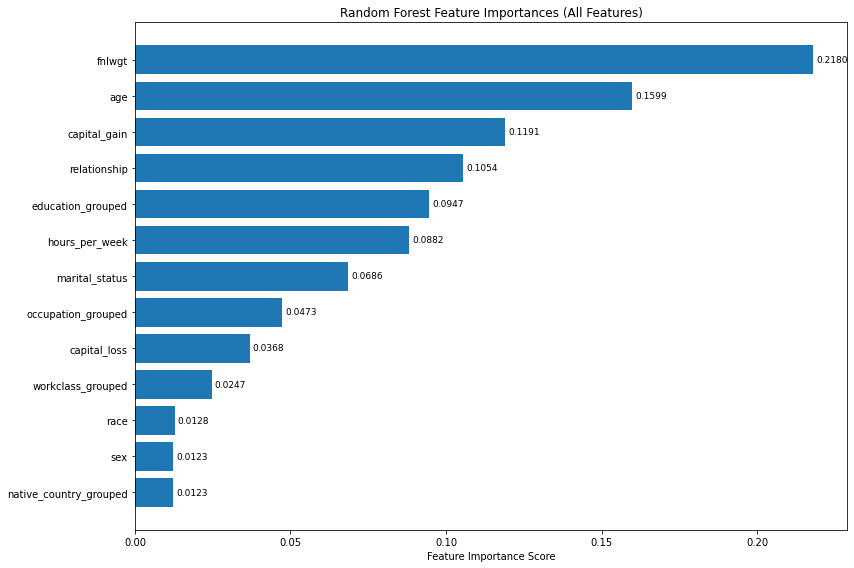

In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Load data
train_df = pd.read_csv("adult_combined_train_80_imputed_2_grouped.csv")

# Split features and target
X_train = train_df.drop(columns=["income"])
y_train = train_df["income"]

# Encode categorical features
encoders = {}
for col in X_train.columns:
    if X_train[col].dtype == "object":
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col].astype(str))
        encoders[col] = le

# Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Feature importances
importances = model.feature_importances_
feature_names = X_train.columns

# Plot all feature importances with labels
plt.figure(figsize=(12, 8))

# Sort features by importance
sorted_idx = importances.argsort()
sorted_importances = importances[sorted_idx]
sorted_features = feature_names[sorted_idx]

plt.barh(sorted_features, sorted_importances)
plt.xlabel("Feature Importance Score")
plt.title("Random Forest Feature Importances (All Features)")

# Add importance score labels beside each bar
for i, v in enumerate(sorted_importances):
    plt.text(v + 0.001, i, f"{v:.4f}", va='center', fontsize=9)

plt.tight_layout()
plt.show()


In [38]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv("adult_combined_train_80_imputed_2_grouped.csv")
test_df = pd.read_csv("adult_combined_test_20_imputed_2_grouped.csv")

# Columns to drop
columns_to_drop = ['fnlwgt', 'race', 'native_country_grouped']
# columns_to_drop = []

# Drop the columns
train_df_cleaned = train_df.drop(columns=columns_to_drop)
test_df_cleaned = test_df.drop(columns=columns_to_drop)

print("Columns dropped and files saved successfully.")

Columns dropped and files saved successfully.


In [39]:
# Save the updated datasets
train_df_cleaned.to_csv("adult_combined_train_80_imputed_2_grouped_feature_selected.csv", index=False)
test_df_cleaned.to_csv("adult_combined_test_20_imputed_2_grouped_feature_selected.csv", index=False)

print("✅ files saved")

✅ files saved
